# Cross Validation

## K-Fold Cross-Validation
Split the training data into K subsets of equal  size. Iterate over the folds where each fold serves as the test set 1 time, and the training set k-1 times. Average testing performance across k test is used as the metric. 

Reduces variance of the testing process by averaging scores. More reliable out of sample performance. Can be used for parameter tuning, model selection, and feature selection. Computationally expensive and can lead to overfitting if too many things are compared at once.


In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

### cross_val_score
Simple K fold Cross Validation

In [3]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y,cv = 10, scoring = 'accuracy')
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


### GridSearchCV
Define a grid of parameters that will be searched using k fold cross val. Input a dictionary with chosen parameters to iterate over, performs k fold on each potential parameter.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise’, return_train_score=’warn’)

#### estimator : estimator object.

This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.



#### param_grid : dict or list of dictionaries

Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.



fit_params - parameters to pass to the fit method

n_jobs - set to 1 by default to test each parameter once, parameters can be searched in parallel with "-1"

#### cv : int, cross-validation generator or an iterable, optional

Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 3-fold cross validation,
integer, to specify the number of folds in a (Stratified)KFold,
An object to be used as a cross-validation generator.
An iterable yielding train, test splits.

return_train_score - "true" saves the results of the cross vallidation



#### Internal Values and Methods
    cv_results_ - a dictionary of masked numpy arrays that can be imported into a pandas dataframe.

    best_estimator_ - estimator that was chosen by the search

    best_score_ - best mean cross validated score

    best_params_ 


Once fit is called, the object becomes the best scoring classifier regressor

In [4]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [5]:
grid_input = {'n_neighbors':list(range(1,31))}
grid = GridSearchCV(knn, grid_input, cv = 5, scoring = 'accuracy', return_train_score = True)
grid.fit(X, y)
res = pd.DataFrame(grid.cv_results_)
res.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000800,0.001001,0.960000,1.000000,1,{'n_neighbors': 1},19,0.966667,1.000000,0.966667,...,0.933333,1.000000,0.933333,1.000000,1.0,1.000000,4.001142e-04,2.611745e-07,0.024944,0.000000
1,0.000800,0.001001,0.946667,0.978333,2,{'n_neighbors': 2},24,0.966667,0.975000,0.933333,...,0.933333,0.975000,0.900000,0.983333,1.0,0.975000,4.002333e-04,1.059824e-06,0.033993,0.004082
2,0.001001,0.000602,0.966667,0.960000,3,{'n_neighbors': 3},10,0.966667,0.958333,0.966667,...,0.933333,0.966667,0.966667,0.966667,1.0,0.950000,3.015783e-07,4.917026e-04,0.021082,0.006236
3,0.000602,0.001100,0.973333,0.963333,4,{'n_neighbors': 4},6,0.966667,0.958333,0.966667,...,0.966667,0.958333,0.966667,0.975000,1.0,0.966667,3.755730e-04,1.986268e-04,0.013333,0.006667
4,0.000500,0.001001,0.973333,0.970000,5,{'n_neighbors': 5},6,0.966667,0.966667,1.000000,...,0.933333,0.975000,0.966667,0.975000,1.0,0.966667,4.475011e-04,4.264961e-07,0.024944,0.004082


Text(0.5,1,'KNN Performance on Iris DataSet')

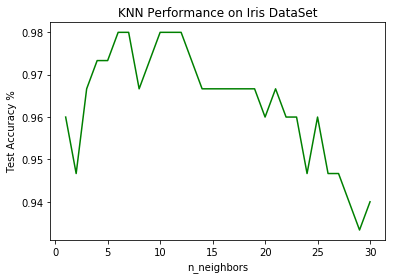

In [6]:
plt.plot( res['param_n_neighbors'], res['mean_test_score'], color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Test Accuracy %')
plt.title('KNN Performance on Iris DataSet')


Text(0.5,1,'KNN Performance on Iris DataSet')

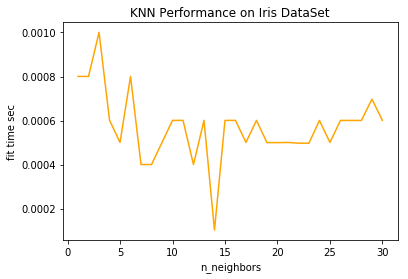

In [7]:
plt.plot( res['param_n_neighbors'], res['mean_fit_time'], color = 'orange')
plt.xlabel('n_neighbors')
plt.ylabel('fit time sec')
plt.title('KNN Performance on Iris DataSet')


In [9]:
print(grid.best_score_, '\n',
      grid.best_params_, '\n',
      grid.best_estimator_)

0.98 
 {'n_neighbors': 6} 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


### Searching Multiple Parameters

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

#### Make your parameter list.


In [11]:
splitter = ['best','random']
max_depth = list(range(1,6))
grid_input = dict(splitter = splitter, max_depth = max_depth)
grid_input

{'max_depth': [1, 2, 3, 4, 5], 'splitter': ['best', 'random']}

In [12]:
grid2 = GridSearchCV(tree, grid_input, scoring = 'accuracy', cv = 5, return_train_score = True)
grid2.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [13]:
res2 = pd.DataFrame(grid2.cv_results_)
res2.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_splitter,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.010119,0.006342,0.666667,0.666667,1,best,"{'max_depth': 1, 'splitter': 'best'}",9,0.666667,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.018489,1.243571e-02,0.000000,0.000000
1,0.000200,0.000800,0.633333,0.611667,1,random,"{'max_depth': 1, 'splitter': 'random'}",10,0.633333,0.666667,...,0.666667,0.666667,0.666667,0.658333,0.533333,0.400000,0.000400,4.003756e-04,0.051640,0.105883
2,0.000200,0.000797,0.933333,0.961667,2,best,"{'max_depth': 2, 'splitter': 'best'}",4,0.933333,0.958333,...,0.900000,0.975000,0.866667,0.966667,1.000000,0.950000,0.000400,3.985336e-04,0.047140,0.008498
3,0.000000,0.000801,0.853333,0.846667,2,random,"{'max_depth': 2, 'splitter': 'random'}",8,0.833333,0.783333,...,0.733333,0.775000,0.833333,0.866667,0.966667,0.933333,0.000000,4.002811e-04,0.077746,0.059768
4,0.000000,0.001001,0.973333,0.973333,3,best,"{'max_depth': 3, 'splitter': 'best'}",1,0.966667,0.958333,...,0.933333,0.991667,1.000000,0.975000,1.000000,0.966667,0.000000,6.217196e-07,0.024944,0.011055


param_splitter
best      AxesSubplot(0.125,0.125;0.775x0.755)
random    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

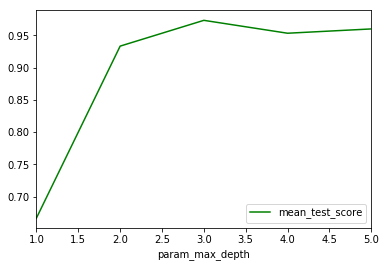

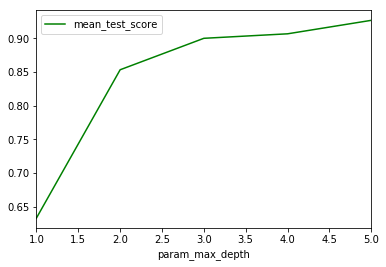

In [14]:
plotinput = res2.groupby('param_splitter')
plotinput.plot( x = 'param_max_depth', y = 'mean_test_score',color='green' )

In [15]:
print(grid2.best_score_, '\n',
      grid2.best_params_, '\n',
      grid2.best_estimator_)

0.973333333333 
 {'max_depth': 3, 'splitter': 'best'} 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### RandomizedSearchCV

Minimizes computational expense by searching a subset of the parameters

In [15]:
from sklearn.model_selection import RandomizedSearchCV
#... same method as before

## Confusion Matrix

True Positives (TP): we correctly predicted that they do have diabetes
True Negatives (TN): we correctly predicted that they don't have diabetes
False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")


Left: Actual

Top: Predicted

In [16]:
from sklearn.metrics import confusion_matrix
pred = grid2.predict(X)
confusion_matrix(y, pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [19]:
import sklearn.metrics
sklearn.metrics.accuracy_score(y, pred)

0.97333333333333338

In [18]:
grid2.score(X,y)

0.97333333333333338